# 1. Loading Data

In [1]:
#Import data and look at the column names
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cars = pd.read_csv('cars_cleaned.csv')

cars = cars[cars['price']<1e5] #drop cars more than $100,000
cars = cars[cars['odometer']<6e5] #drop cars with more than 600,000 km

cars.columns

Index(['condition', 'drive', 'fuel', 'location', 'odometer', 'paint color',
       'price', 'sale type', 'title status', 'transmission', 'type',
       'cylinders', 'size', 'latitude', 'longitude', 'location_simple', 'year',
       'age', 'make_', 'model', 'pos_words', 'neg_words', 'low_text', 'model0',
       'model1', 'model2'],
      dtype='object')

In [2]:
#look at the first few lines of data
cars.head()

,condition,drive,fuel,location,odometer,paint color,price,sale type,title status,transmission,...,year,age,make_,model,pos_words,neg_words,low_text,model0,model1,model2
0,good,4wd,gas,vancouver,281000,white,5500,owner,rebuilt,automatic,...,2007,14,bmw,x3,False,False,False,x3,None,None
1,unknown,fwd,gas,vancouver,140000,unknown,600,owner,clean,automatic,...,1984,37,honda,accord,False,False,False,accord,None,None
2,excellent,rwd,diesel,vancouver,110000,white,67000,owner,clean,automatic,...,2008,13,gmc,c7500,False,False,False,c7500,None,None
3,unknown,fwd,gas,vancouver,243000,unknown,4000,owner,clean,automatic,...,2003,18,acura,rsx,True,False,False,rsx,None,None
4,salvage,fwd,gas,vancouver,225000,black,1500,owner,salvage,automatic,...,2005,16,acura,rsx,False,False,False,rsx,None,None


In [3]:
#check for missing data
def get_missing_info(df):
    num_entries = df.shape[0]*df.shape[1]
    null_entries = df.isnull().sum().sum()
    percent_empty = null_entries/num_entries*100
    num_missing = df.isna().sum()
    percent_missing = num_missing/len(df)*100
    col_modes = df.mode().loc[0]
    percent_mode = [df[x].isin([df[x].mode()[0]]).sum()/len(df)*100 for x in df]
    missing_value_df = pd.DataFrame({'num_missing': num_missing,
                                     'percent_missing': percent_missing, 
                                     'mode': col_modes,
                                     'percent_mode':percent_mode})
    print('total empty percent:', percent_empty, '%')
    print('columns that are more than 97% mode:', missing_value_df.loc[missing_value_df['percent_mode']>97].index.values)
    return(missing_value_df)
get_missing_info(pd.read_csv('cars.csv'))

total empty percent: 11.392145835597836 %
columns that are more than 97% mode: []


,num_missing,percent_missing,mode,percent_mode
Unnamed: 0,0,0.000000,0,0.002678
body text,0,0.000000,\n\nQR Code Link to This Post\n\n\nOur Best Pr...,0.088375
condition,7966,21.333119,excellent,49.712113
drive,9137,24.469082,4wd,34.806245
fuel,0,0.000000,gas,89.673549
latlong,0,0.000000,0.000000;0.000000,17.993626
location,0,0.000000,Surrey,9.118663
make,0,0.000000,2018 mazda cx-5 gt awd,0.291904
odometer,105,0.281192,1.0,1.813021
paint color,11122,29.784955,white,17.964168


# 2. Histograms of Indicator Variables

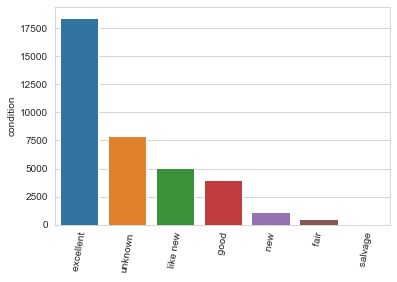

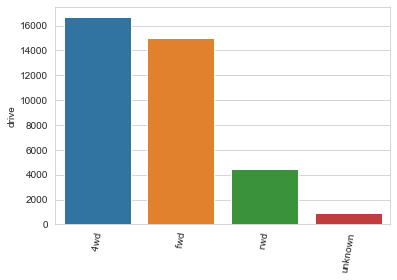

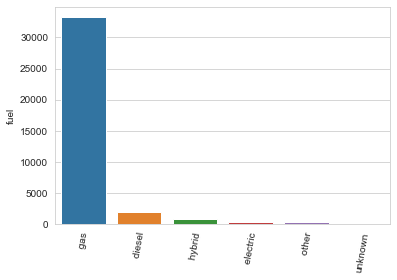

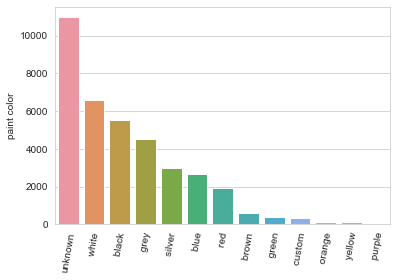

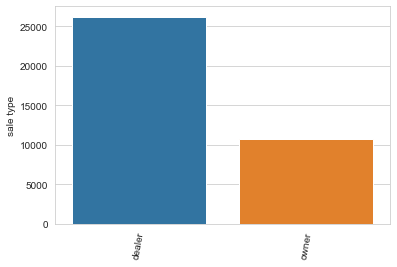

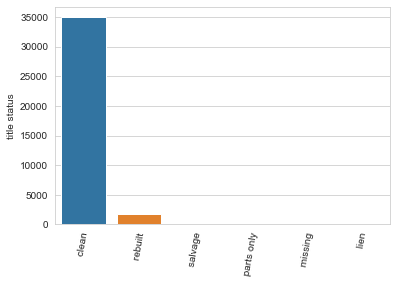

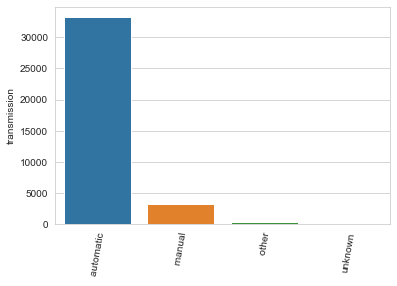

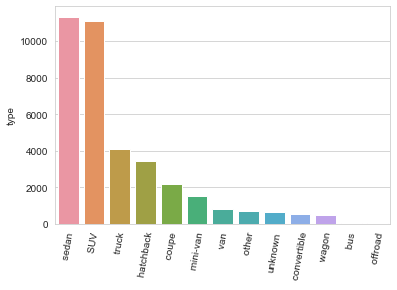

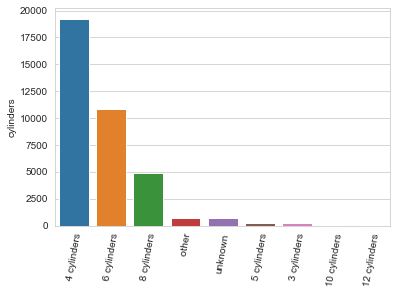

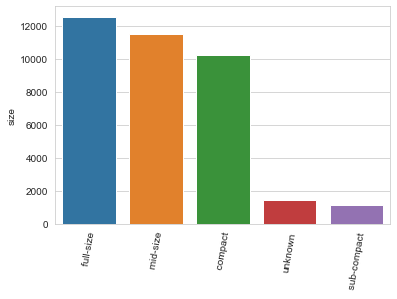

In [4]:
#Plot histograms of some of the indicator variables to better understand the distribution of data.
sns.set_style("whitegrid")

for col in ['condition', 'drive', 'fuel', 'paint color', 'sale type', 'title status', 'transmission', 'type', 
            'cylinders', 'size']:
    dat = cars[col].value_counts()
    sns.barplot(x = dat.index, y = dat)
    plt.xticks(rotation=80)
    plt.show()

# 3. Price Histogram and Density Functions

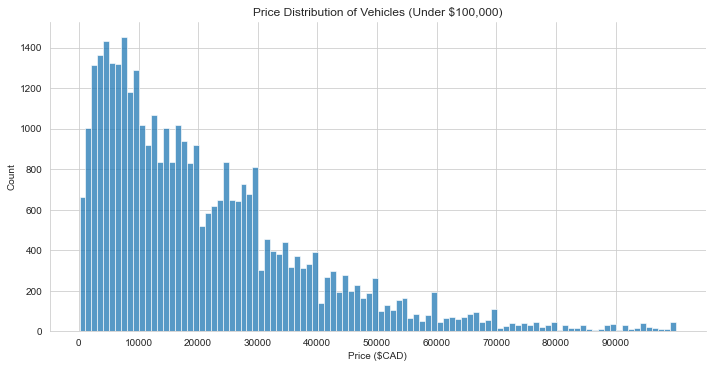

In [5]:
#plot price histogram
cars = cars[cars.price<1e5]

sns.displot(cars, x='price', binwidth=1000, height=5, aspect=2)#, bw_adjust=0.4)
plt.xticks(range(0,int(1e5), int(1e4)))
plt.xlabel('Price ($CAD)')
plt.title('Price Distribution of Vehicles (Under $100,000)')
plt.show()

Price distribution for all of the vehichles. The overall distribution is skewed right, with the most common price being between \\$3,000-\\$8,000.

Note the dips in price at multiples of \\$10,000. This indicates a psychological pricing strategy (eg.  asking \\$19,000 instead of \\$20,000 in hopes that the price will seem lower than it actually is).

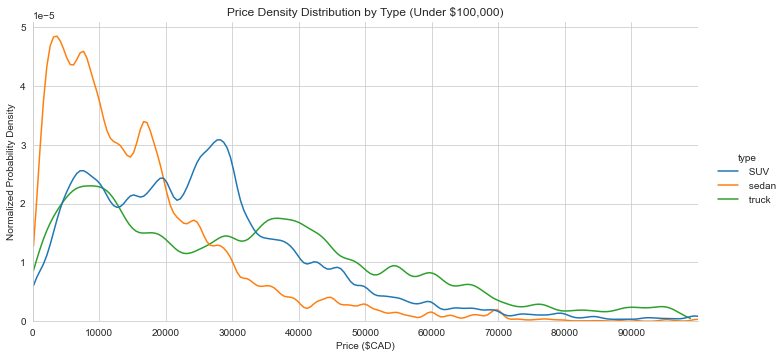

In [6]:
#plot pricing probability density for different types of vehicle
cars_plt = cars[cars.type.isin([' sedan', ' SUV', ' truck'])]
sns.displot(cars_plt, x='price', hue='type', kind='kde', bw_adjust=0.4, cut=0, common_norm=False, height=5, aspect=2)#, bw_adjust=0.4)
plt.xticks(range(0,int(1e5), int(1e4)))
plt.xlabel('Price ($CAD)')
plt.xlim(0,int(1e5))
plt.ylabel('Normalized Probability Density')
plt.title('Price Density Distribution by Type (Under $100,000)')
plt.show()

Probability density of price for sedans, SUVs, and Trucks. The curves hve been noramlized so the area under each curve is 1. Sedans are the most skewed to the low price end. SUVs and trucks have lower end options (under \\$10,000) but are also commonly found in the \\$30,000-\\$40,000 range. The psychological strategy of pricing just under multiples of \\$10,000 is more apparent here. This might be a good strategy on Craigslist as potential buyers might tend to use the pricing filter on their search with a bands at a round numbers.

Another interesting feature is the dip in trucks between \\$15,000 and \\$30,000, this may indicate there is less turnover in trucks for this price. Perhaps this means people are happy with their trucks in this range, so if you find one it could be a good buy.

In [7]:
#take a look at the mean year and odometer for trucks in this range
cars[(cars.type==' truck') & (15000<cars.price) & (cars.price<30000)].mean()[['odometer', 'year']]

odometer    165200.730216
year          2010.598321
dtype: float64

It appears that a 2010 truck with 170,000km for might be a good buy if someone is willing to part with it.

## 4. Price Distribution by Odometer and Year

We now turn our attention to developing a contourplot of price vs odometer and year to get an an idea of how vehichles depreciate over their lifetime. This task is complicated by the noise in the pricing data (ie. for a given year and odometer reading, there can be many different prices in the dataset). We will get around this by converting our pricing data to a moving average over odometer readting and year. 

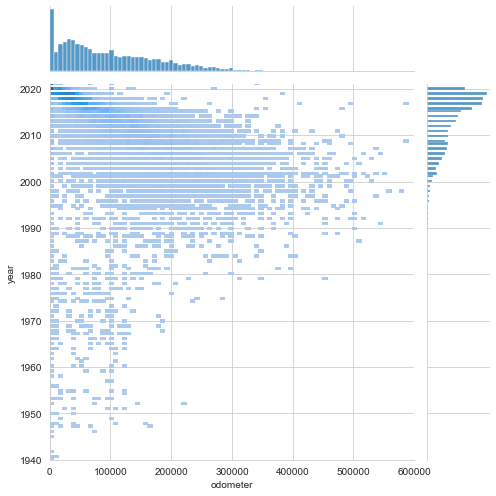

In [8]:
#First we will look at the distribution of vehicles over odometer and year.
cars = cars[cars.odometer<1e6]

g = sns.JointGrid(data=cars, x='odometer', y='year', height = 7, xlim = (0, 6e5), ylim=(1940, 2021))
g.plot_joint(sns.histplot)
g.plot_marginals(sns.histplot)
plt.show()

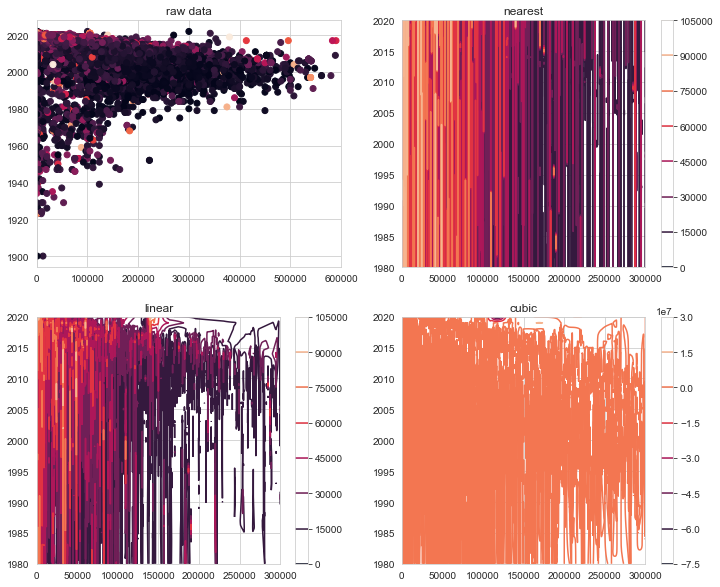

In [9]:
#interpolate pricing data using several different methods
from scipy.interpolate import griddata
#available sample data for the contour plot
xs = cars['odometer']
ys = cars['year']
zs = cars['price']
points = np.array([xs, ys]).T 
#we wish to interpolate the data above onto the grid below
grid_x, grid_y = np.meshgrid(
    np.linspace(0,3e5,5000), #odometer goes from 0 to 300,000km with steps of 300,000/5000 = 60km
    np.arange(1980,2021,1)) #year goes from 1980 to 2021 in steps of 1 year

#try out three different methods of interpolation
grid_z0 = griddata(points, zs, (grid_x, grid_y), method='nearest')
grid_z1 = griddata(points, zs, (grid_x, grid_y), method='linear')
grid_z2 = griddata(points, zs, (grid_x, grid_y), method='cubic')

#plot the raw data
fig, axs = plt.subplots(2, 2, figsize=(12,10))
axs[0,0].scatter(xs, ys, c=zs)
axs[0,0].set_xlim(0,6e5)
axs[0,0].set_title('raw data')

#plot the three different interpolation methods
im = axs[0,1].contour(grid_x, grid_y, grid_z0)
fig.colorbar(im, ax=axs[0,1])
axs[0,1].set_title('nearest')

im = axs[1,0].contour(grid_x, grid_y, grid_z1)
fig.colorbar(im, ax=axs[1,0])
axs[1,0].set_title('linear')

im = axs[1,1].contour(grid_x, grid_y, grid_z2)
fig.colorbar(im, ax=axs[1,1])
axs[1,1].set_title('cubic')
plt.show()

All three methods are clearly very noisy but the cubic method is prodocing unrealistic values so will not be used. We will proceed with the 'nearest' interpolation method for simplicity.

Depreciation rate: $0.20/km


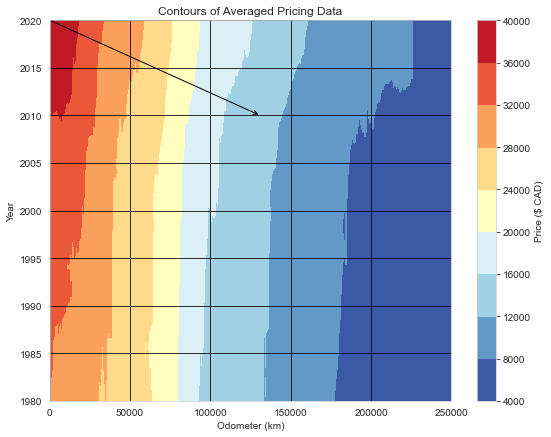

Depreciation rate: $0.20/km


In [133]:
#Filter out noise in the interpolated dataset and plot the final contour.
from scipy.signal import convolve2d
sz_o = 500 #size of averaging window for odometer (500steps * 60km/step = 30,000km)
sz_y = 3 #size of averaging window for year (3 years or +-1 year)
kernel = np.ones((sz_y,sz_o))/(sz_y*sz_o)#averaging kernel, corresponds to averaging over +-15000 km and +-1 year
grid_z0f = convolve2d(grid_z0, kernel, boundary='symm', mode='same')#run a moving average over the 'nearest' interpolated dataset

fig, ax = plt.subplots(1, figsize=(9,7))
im = ax.contourf(grid_x, grid_y, grid_z0f, levels=10, cmap='RdYlBu_r', zorder=0)
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Price ($ CAD)')
ax.set_xlim(0, 2.5e5)
ax.set_xlabel('Odometer (km)')
ax.set_ylabel('Year')
ax.set_title('Contours of Averaged Pricing Data')
ax.grid(True, color='k')
ax.annotate("", xy=(1.31e5, 2010), xytext=(0, 2020), arrowprops=dict(arrowstyle="->", color='k'))
plt.show()

xloc_e = np.where((1.309e5<grid_x[0]) & (grid_x[0]<1.31e5)) #find x grid location where km's driven is what we want
yloc_e = 30 #row 30 of the y grid is 2010
price_end = grid_z0f[yloc_e,xloc_e[0]]
yloc_s = 40 #row 40 of the y grid is 2020
xloc_s = np.where(grid_x[0]==0)
price_start = grid_z0f[yloc_s,xloc_s[0]]
depr_rate = ((price_start-price_end)/1.31e5)[0]
print('Depreciation rate: ${:.2f}/km'.format(depr_rate))

So odometer reading is much more important than year to determine price. According to this data, a newer vehicle would only loose ~20\% (\\$8,000) of its value after 40 years with no driving. On the other hand, the same vehicle driven 50,000km in one year would lose 20-30\% of its value.

The arrow on the plot indicates the depreciation for a vehicle driven 13,100 km driven per year ([average for British Columbia](https://www.ahainsurance.ca/car-insurance/average-mileage-per-year-canada/#:~:text=According%20to%20Natural%20Resources%20Canada,Canada%20is%20about%2015%2C200%20kilometres.)) for 10 years. This works out to a depreciation rate of $0.20/km.

# 5. Pricing of the Most Popular Vehicles

We will take a look at the price distribution over the most popular vehicles

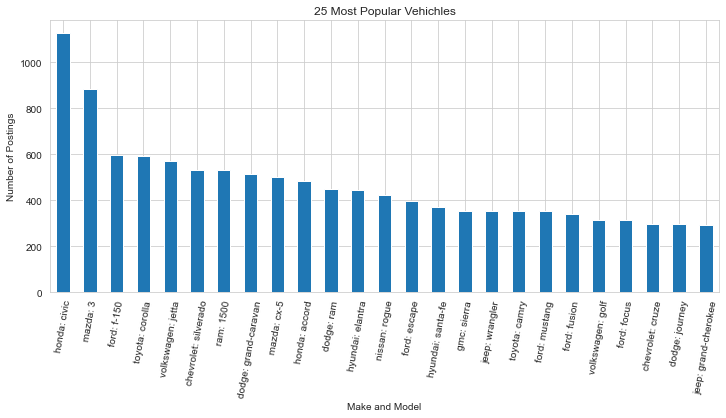

In [11]:
#Take a look at the most popular vehicles for sale
cars['make_model0'] = cars['make_'] + ': ' + cars['model0'] #add a column with the make and model in one string (for plotting)
com_cars = cars.make_model0.value_counts()[:25]#the 25 most popular cars

#plot the results
fig = com_cars.plot.bar(figsize=(12,5))
plt.xlabel('Make and Model')
plt.ylabel('Number of Postings')
plt.title('25 Most Popular Vehichles')
plt.xticks(rotation=80)
plt.show()

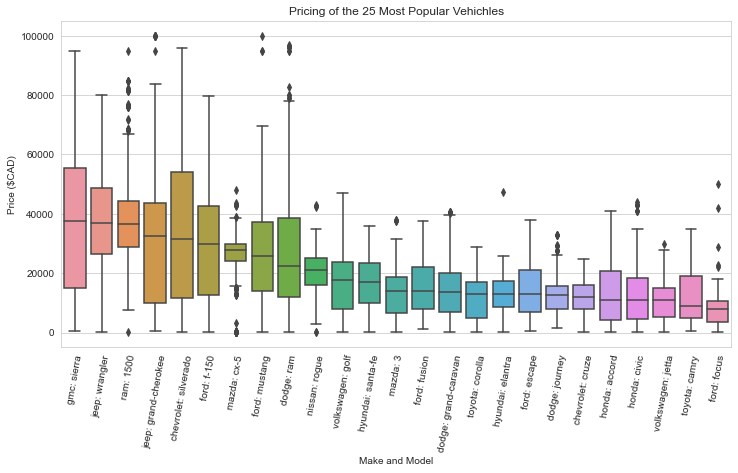

In [12]:
#plot the average prices of the 25 most popular cars
com_price = cars.loc[cars.make_model0.isin(com_cars.index)]#.median().sort_values(ascending=False)
ordered_labels = com_price.groupby('make_model0').price.median().sort_values(ascending=False).index.values

fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(data=com_price, x="make_model0", y="price", order=ordered_labels, ax=ax)
plt.xticks(rotation = 80)
plt.xlabel('Make and Model')
plt.ylabel('Price ($CAD)')
plt.title('Pricing of the 25 Most Popular Vehichles')
plt.show()

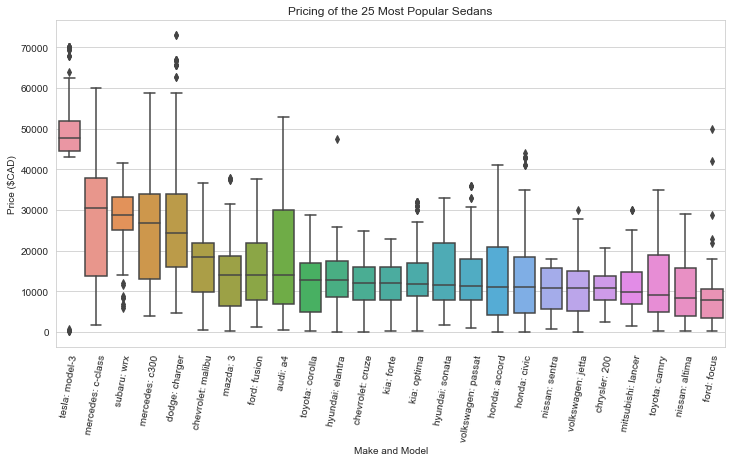

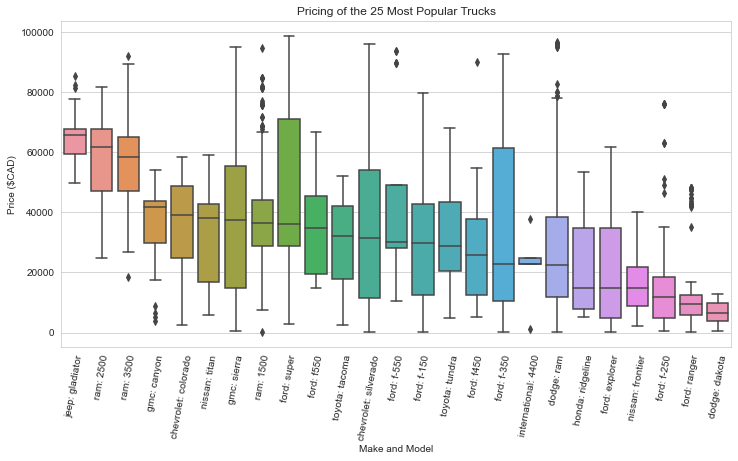

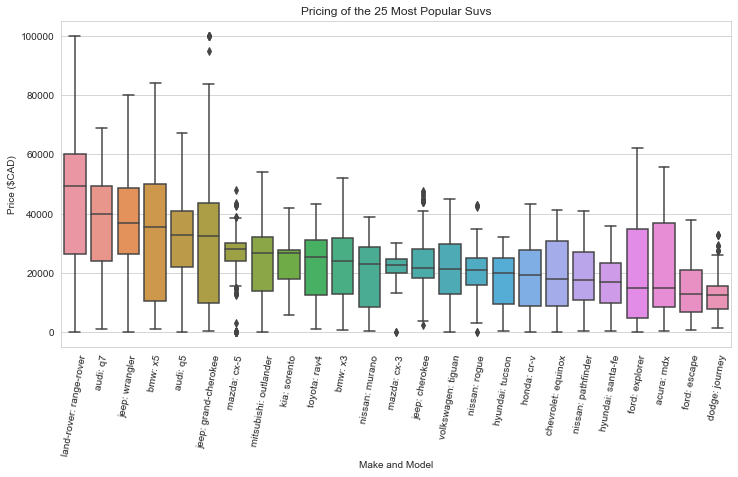

In [13]:
#plot the average prices of the 25 most popular trucks, trucks, and SUVS
for thing in [' sedan', ' truck', ' SUV']:
    com = cars[cars['type']==thing].make_model0.value_counts()[0:25].index
    com_price = cars.loc[cars.make_model0.isin(com)]
    ordered_labels = com_price.groupby('make_model0').price.median().sort_values(ascending=False).index.values
    
    fig, ax = plt.subplots(figsize=(12,6))
    sns.boxplot(data=com_price, x="make_model0", y="price", order=ordered_labels, ax=ax)
    plt.xticks(rotation = 80)

    plt.xlabel('Make and Model')
    plt.ylabel('Price ($CAD)')
    plt.title('Pricing of the 25 Most Popular {}s'.format(thing[1:].capitalize()))
    plt.show()

# 6. Depreciation of the Most Popular Vehicles

When buying a car, you are not only interested in the current price, but the future price you might be able to sell it for. Here we will fit a decaying exponential function to individual model of vehicle to quantify the depreciation of that model over time. This will tell us if that model 'holds its value'.

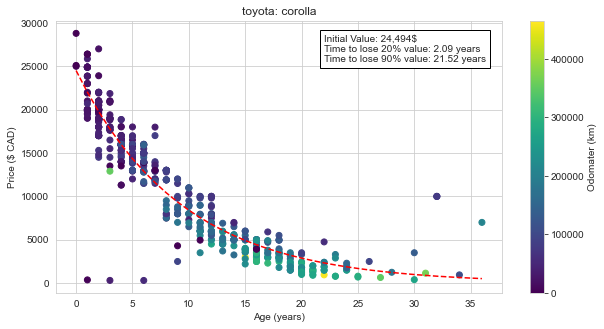

In [14]:
#fit an exponential to the toyota corolla data to determine how well it holds its value
from scipy.optimize import curve_fit
def func(x, a, b):
    return a * np.exp(-b*x)#exponential function we will use to fit

def plot_depr(data, func, model):
    #get model data and filter out cars older than 50 years
    df = data[(data['make_model0']==model) & (data['age']<=50)].sort_values(by='age')
    xdata = df['age']
    ydata = df['price']
    
    #fit to the data
    popt, _ = curve_fit(func, xdata, ydata, p0=[4e4, 0.1])#fit the exponential to the data
    init = popt[0]#intiial value (age=0) according to the curve fit
    depr20 = -np.log(0.80)/popt[1]#time to depreciate 20% according to the curve fit
    depr90 = -np.log(0.10)/popt[1]#time to depreciate 90% according to the curve fit
    
    fig, ax = plt.subplots(figsize=(10,5))
    carplt = ax.scatter(xdata, ydata, c=df['odometer'], cmap='viridis')#scatter plot of age vs price, colored by odometer    
    plt.plot(xdata, func(xdata, *popt), 'r--')#plot the fitted curve
    
    plt.text(0.6, 0.85, 
             'Initial Value: {:,.0f}$\n'
             'Time to lose 20% value: {:.2f} years\n'
             'Time to lose 90% value: {:.2f} years'.format(init, depr20, depr90),
             transform = ax.transAxes, 
            bbox=dict(facecolor='white', edgecolor='black'))
    
    cbar=plt.colorbar(carplt)
    cbar.set_label('Odomater (km)')
    plt.xlabel('Age (years)')
    plt.ylabel('Price ($ CAD)')
    plt.title(model)
    plt.show()
    
plot_depr(cars, func, 'toyota: corolla')
# print('time to depreciate 40%:', -np.log(0.60)/popt[1])

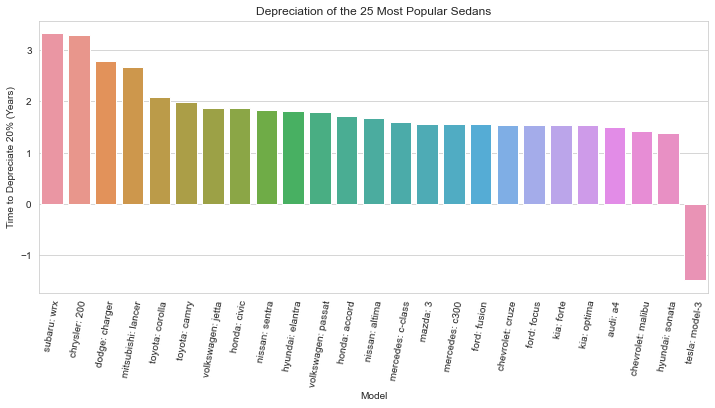

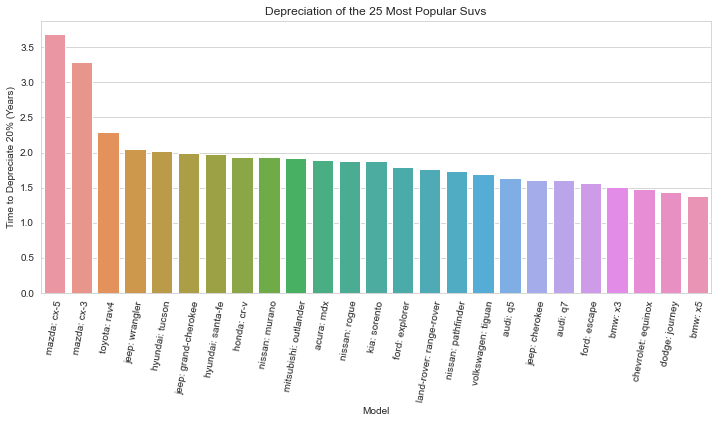

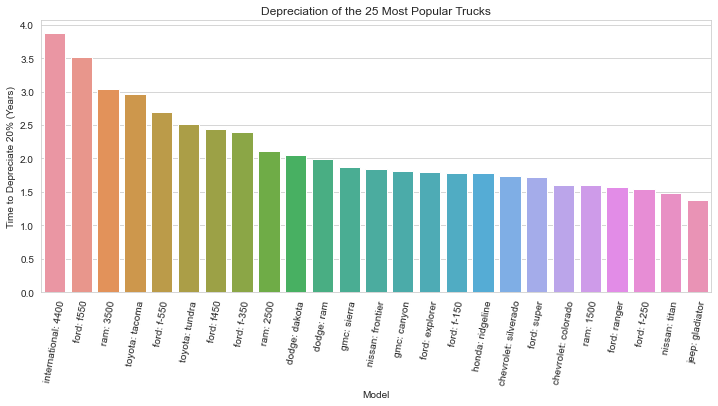

In [15]:
#run curve fits for the 25 most popular sedans, SUVs, and trucks and plot
for kind in [' sedan', ' SUV', ' truck']:#loop over the type of vehicle
    com = cars[cars['type']==kind].make_model0.value_counts()[0:25].index #25 most popular models of this type
    depr_df = pd.DataFrame(columns={'Model', 'val0', 'depr20', 'depr90'}) #initialize an empty dataframe to hold the data
    for name in com:#loop over the models
        df = cars[(cars['make_model0']==name) & (cars['age']<=50)].sort_values(by='age')
        xdata = df['age']
        ydata = df['price']  
        popt, pcov = curve_fit(func, xdata, ydata, p0=[4e4, 0.1])

        init = popt[0]
        depr20 = -np.log(0.80)/popt[1]
        depr90 = -np.log(0.10)/popt[1]
        depr_df = depr_df.append({'Model':name, 'val0':init, 'depr20':depr20, 'depr90':depr90}, ignore_index=True)

    depr_df = depr_df.sort_values(by='depr20', ascending=False)

    fig, ax = plt.subplots(figsize=(12,5))
    sns.barplot(data=depr_df, x='Model', y='depr20', ax=ax)
    plt.title('Depreciation of the 25 Most Popular {}s'.format(kind[1:].capitalize()))
    plt.ylabel('Time to Depreciate 20% (Years)')
    plt.xticks(rotation = 80)
    plt.show()

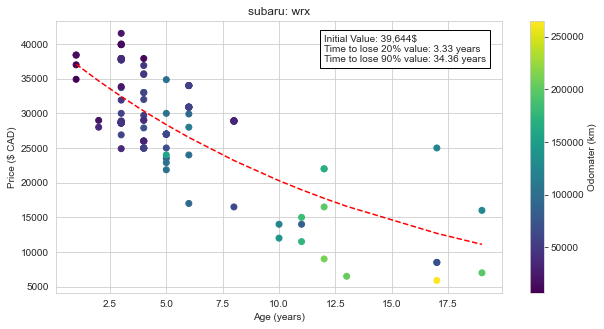

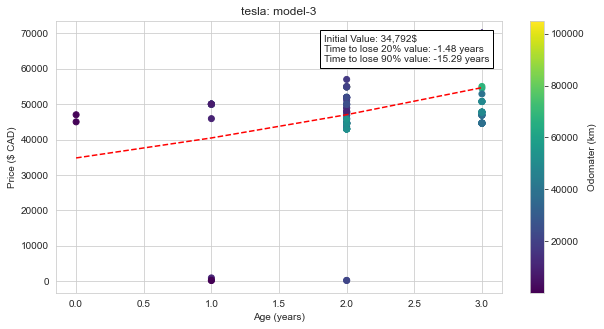

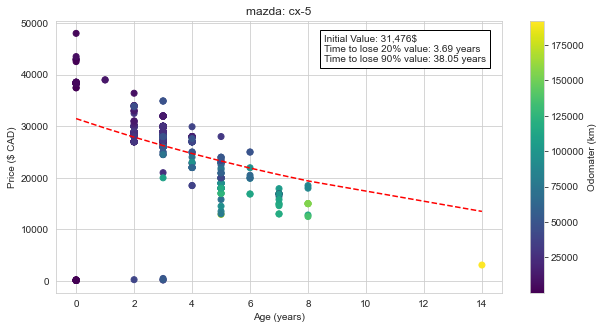

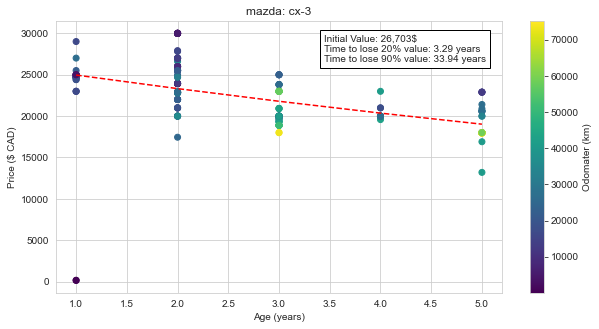

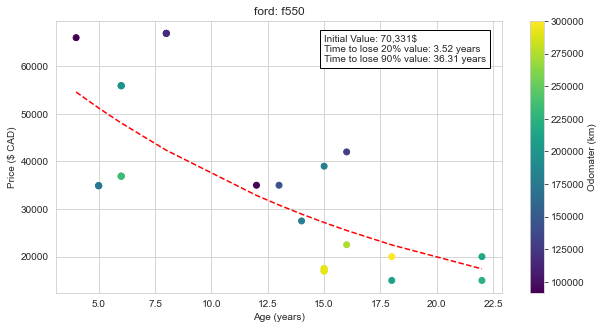

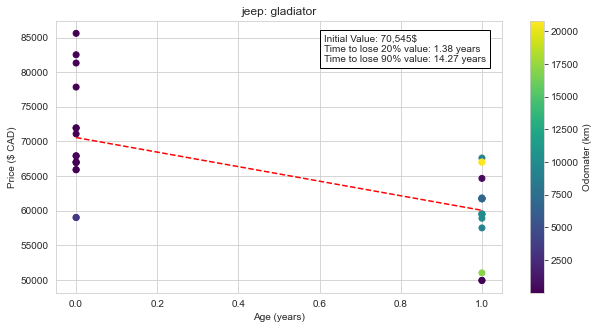

In [16]:
#There are some surprising values above - take a closer look at the curve fits
for name in ['subaru: wrx', 'tesla: model-3', 'mazda: cx-5', 'mazda: cx-3', 'ford: f550', 'jeep: gladiator']:
    plot_depr(cars, func, name)

A few of the outlier depreciation values are due to outliers (this could be something to correct for in the future). But for most the curves look reasonable. Note that the tesla is increasing in value! Meanwhile we see the new Jeep Gladiator has depreciated quite a bit after its first year.

Many people say that Toyotas hold their value. Let us see if that is true in our dataset by calculating the median deprecition value for different vehicle manufacturers. 

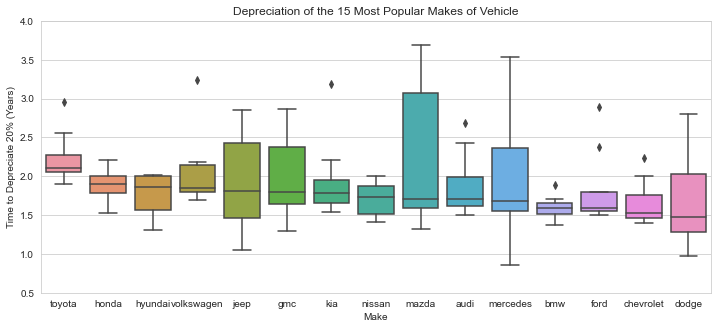

In [17]:
#Boxplot of deprecition for different manufactureers
makes = cars['make_'].value_counts()[:15].index#15 most popular manufacturers
depr_df = pd.DataFrame(columns={'Make', 'Model', 'val0', 'depr20', 'depr90'})#this will hold the depreciation data
for make in makes:#loop over manufactureres
    com = cars[cars['make_']==make].model0.value_counts()[0:10].index #get the 10 most poopular models by the manufacturer
    for name in com:#look over the models
        df = cars[(cars['model0']==name) & (cars['age']<50)].sort_values(by='age')#get data for the model for ages under 50
        xdata = df['age']
        ydata = df['price']  
        popt, pcov = curve_fit(func, xdata, ydata, p0=[4e4, 0.1])#fit to the data

        init = popt[0]#initial value
        depr20 = -np.log(0.80)/popt[1]#time to depreciate 20%
        depr90 = -np.log(0.10)/popt[1]#time to depreciate 90%
        #append this data to the dataframe
        depr_df = depr_df.append({'Make':make, 'Model':name, 'val0':init, 'depr20':depr20, 'depr90':depr90}, ignore_index=True)

#order the data in terms of decreasing median depreciation time
order = depr_df.groupby('Make')['depr20'].median().sort_values(ascending=False).index

fig, ax=plt.subplots(figsize=(12,5))
sns.boxplot(data=depr_df, x='Make', y='depr20', order=order)
plt.title('Depreciation of the 15 Most Popular Makes of Vehicle')
plt.ylabel('Time to Depreciate 20% (Years)')
plt.ylim(0.5,4)
plt.show()

So Toyotas do indeed hold their value the best, with a median time of about 2.1 years for a vehicle to depreciate 20\%. Meanwhile a Dodge would only take 1.5 years to depreciate the same fraction. 

Use caution when interpreting this data due to the large variability within manufacturers. It is likely best to determine the depreciation value for the individual model in question when considering a purchase.

# 7. Geographic Distribution of Vehicles

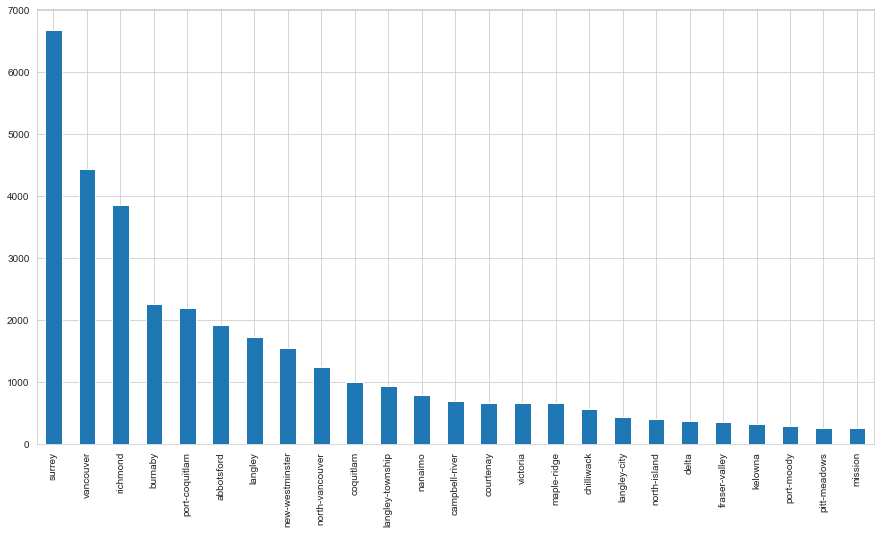

In [18]:
#look at the most popular locations for listings
fig = cars.location_simple.value_counts()[0:25].plot.bar(figsize=(15,8))
plt.show()

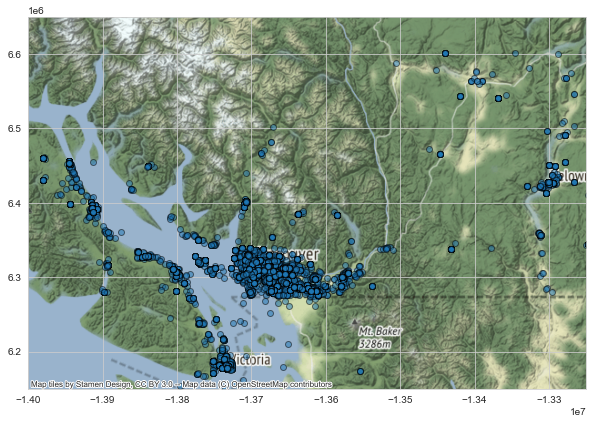

In [19]:
#map distribution of vehichles
import geopandas as gpd
import contextily as ctx
gdf = gpd.GeoDataFrame(#convert the data to a geodataframe so it can be plotted on a map
    cars, geometry=gpd.points_from_xy(cars.longitude, cars.latitude))
#remove data outside the geographic area of interest
gdf = gdf[(48<gdf.latitude) & (gdf.latitude<52) & (-127<gdf.longitude) & (gdf.longitude<-115)]
#tell geopandas what the coordinate system of our data is
gdf = gdf.set_crs(epsg=4326)#this is the latitude/longitude system the scraped data was in
gdf = gdf.to_crs(epsg=3857)#this is the coordinate system that the imported map is in

#plot the geographic area where data was collected and the points of the vehicles
ax = gdf.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, zoom=7)
plt.xlim(-1.4e7,-1.325e7)
plt.ylim(6.15e6,6.65e6)
plt.show()

Most of the data is concentrated in the Vancouver area. We will take a closer look at this area and see how different types of vehicle are distributed in the cities vs the suburbs.

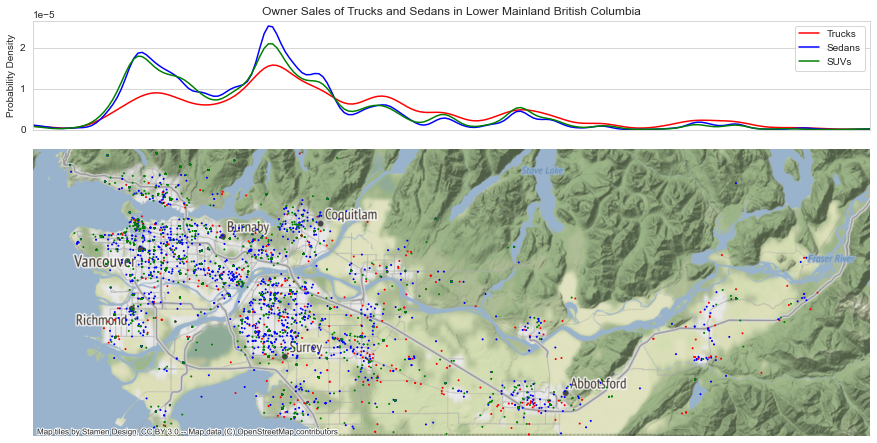

In [20]:
#plot the distribution of sedans, trucks, and suvs in the area around Vancouver
import geoplot
extent = (-1.373e7,-1.354e7, 6.275e6,6.34e6) #x and y limits of where we will plot

#look at owner sales of trucks, sedans, and SUVS
gtrucks = gdf[(gdf['type']==' truck') & (gdf['sale type']=='owner')]
gsedans = gdf[(gdf['type']==' sedan') & (gdf['sale type']=='owner')]
gsuvs = gdf[(gdf['type']==' SUV') & (gdf['sale type']=='owner')]
#get the longitude data for each type of vehicle
trucks= pd.Series(gtrucks.geometry.x)
sedans= pd.Series(gsedans.geometry.x)
suvs= pd.Series(gsuvs.geometry.x)

fig, ax = plt.subplots(2, figsize=(15, 8), gridspec_kw={'height_ratios': [1, 3], 'hspace':0})
#plot the density distribution of each type by longitde
sns.kdeplot(data=trucks, ax=ax[0], clip=(extent[0], extent[1]), bw_adjust=0.15, label='Trucks', color='red')
sns.kdeplot(data=sedans, ax=ax[0], clip=(extent[0], extent[1]), bw_adjust=0.15, label='Sedans', color='blue')
sns.kdeplot(data=suvs, ax=ax[0], clip=(extent[0], extent[1]), bw_adjust=0.15, label='SUVs', color='green')
ax[0].set_xlim(extent[0], extent[1])#set the x limits of the plot to be the same as our map
ax[0].set_ylabel('Probability Density')
ax[0].set_title('Owner Sales of Trucks and Sedans in Lower Mainland British Columbia')
ax[0].set_xticks([])
ax[0].legend()

#Plot the location of each posting on a map
geoplot.pointplot(gtrucks, ax=ax[1], s=1, color='red')
geoplot.pointplot(gsedans, ax=ax[1], s=1, color='blue')
geoplot.pointplot(gsuvs, ax=ax[1], s=1, color='green')
ax[1].axis(extent)
ctx.add_basemap(ax[1], zoom=10)

plt.show()

The plot above shows the distribution of sedan, suv, and truck sales by owner in lower mainland BC (where the heighest concentration of data is located). The top probability density curves show the normalized distribution of each vehicle type over longitude. As expected, distinct peaks in both curves occur around Vancouver/Richmond and Surrey where many sales are located. 

Note that sedan and SUVs sales are more highly concentrated in the urban centres and truck sales are more evenly distribued. While it might be intuitive that trucks are more likely to be found in the suburbs, it is intersting to note that SUVs are found in high proportion in the city centres alongside sedans.